## response of state space model  
Reference:  
[1] http://y373.sakura.ne.jp/minami/pyctrl  
[2] "Pythonによる制御工学入門(第1版)", 南裕樹, オーム社  
[3] "Control Engineering: MATLAB Exercies", Laszlo.K et al, Springer  

(Disclaimer: I don't know why but rayout of matrices gets weired in Jupyter notebook. If something is missing please let me know.)
Let us think of the response to state space model (SSM) here.

Assuming that we have the following state-space representation:

$$
A = \left(
\begin{equation}
\begin{matrix}
0 & 1 \\
-4 & -5 \\
\end{matrix}
\end{equation}
\right),
$$
$$
B = \left(
\begin{array}
00 \\
1 \\
\end{array}
\right),
$$

$$
C = \left(\begin{equation}
\begin{array}
01 & 0 \\
0 & 1 \\
\end{array}\end{equation}\right)
$$
$$
D = \left(
\begin{array}
00 \\
0 \\
\end{array}
\right)
$$

$$
\dot{\boldsymbol{x}} = A\boldsymbol{x} + Bu
$$

Now, when there is no input, the equation just gives us $\dot{x} = Ax$. By doing inverse laplace transformation to both sides of equation we get:

$$
s\boldsymbol{x}(s) - \boldsymbol{x}(0) = A\boldsymbol{x}(s)
$$
$$
\boldsymbol{x}(s) = (sI-A)^{-1}\boldsymbol{x}(0)
$$
$$
\boldsymbol{x}(t) = \mathscr{L}^{-1}[(sI-A)^{-1}]\boldsymbol{x}(0)
$$

Here $\mathscr{L}^{-1}[(sI-A)^{-1}]$ can be expressed as:
$$
\mathscr{L}^{-1}[(sI-A)^{-1}] = I + At + \frac{A^2t^2}{2!} + \frac{A^3t^3}{3!} + ...= e^{At}
$$

This gives us a solution for the system when there is no input. Python-control library provides the method to simulate this:

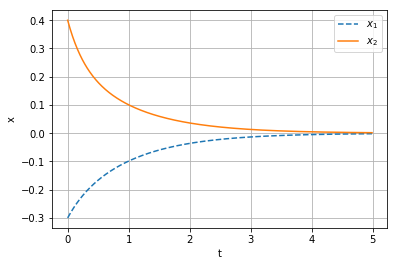

In [8]:
from control.matlab import *
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

A = [[0, 1], [-4, -5]]
B = [[0], [1]]

C = np.eye(2)
D = np.zeros([2, 1])
P = ss(A, B, C, D) # system

Td = np.arange(0, 5, 0.01)
X0 = [-0.3, 0.4]
x, t = initial(P, Td, X0)

plt.plot(t, x[:, 0], linestyle="--", label="$x_1$")
plt.plot(t, x[:, 1], linestyle="-", label="$x_2$")
plt.grid()
plt.legend()
plt.xlabel("t")
plt.ylabel("x")
plt.show()

Furthermore, let us determine the response of this sytem when there is an input to it. Assuming $\boldsymbol{x}(t) = e^{\boldsymbol{A}t}\boldsymbol{z}(t)$ is one of valid solutions for this equation. Then:
$$
\boldsymbol{\dot{x}}(t) = Ae^{\boldsymbol{A}t}\boldsymbol{z}(t) + e^{\boldsymbol{A}t}\boldsymbol{\dot{z}(t)} = \boldsymbol{A}\boldsymbol{x}(t) + e^{\boldsymbol{A}t}\boldsymbol{\dot{z}}(t)
$$
Since this equation should be equal to $\boldsymbol{x}(t) = e^{\boldsymbol{A}t}\boldsymbol{x}(t)$, we only need to determine $\boldsymbol{z}(t)$ such that $e^{\boldsymbol{A}t}\boldsymbol{\dot{z}}(t) = \boldsymbol{B}u(t)$. This gives us:

$$\boldsymbol{\dot{z}}(t) = e^{-\boldsymbol{A}t}\boldsymbol{B}u(t)$$
$$\boldsymbol{z}(t) - \boldsymbol{z}(0) = \int_{0}^{t}{e^{-A\tau}\boldsymbol{B}u(\tau)d\tau}$$

Therefore, we get the $\boldsymbol{x}(t) = e^{\boldsymbol{A}t}\boldsymbol{z}(t)$ by pluging-in the above result to it,

$$\boldsymbol{x}(t) = e^{\boldsymbol{A}t}\boldsymbol{x}(0) + \int_{0}^{t}e^{\boldsymbol{A}(t-\tau)}\boldsymbol{B} u(\tau)d\tau$$
$$\because \boldsymbol{z}(0) = \boldsymbol{x}(0) $$
The first and second terms of this fomula are respectively called "zero input response," and "zero state reponse."

Let us check the "zero state" response first.
Python control library provides the library to simulate the response for this:

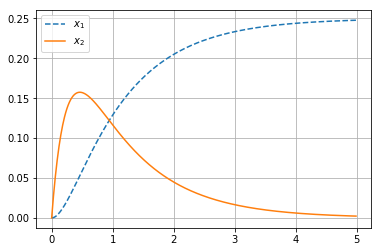

In [9]:
Td = np.arange(0, 5, 0.01)
x, t = step(P, Td) # response for step input

plt.plot(t, x[:, 0], linestyle="--", label="$x_1$")
plt.plot(t, x[:, 1], linestyle="-", label="$x_2$")
plt.grid()
plt.legend()
plt.show()

The overall response is given by the fomula 
$$\boldsymbol{x}(t) = e^{\boldsymbol{A}t}\boldsymbol{x}(0) + \int_{0}^{t}e^{\boldsymbol{A}(t-\tau)}\boldsymbol{B} u(\tau)d\tau$$

C:\Users\socre\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


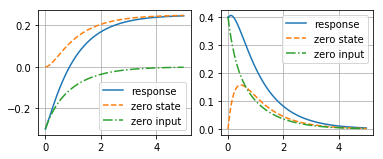

In [18]:
Td = np.arange(0, 5, 0.01)
Ud = 1 * (Td>0) # step input
X0 = [-0.3, 0.4] # the initial state

xst, t = step(P, Td) # zero state response
xin, _ = initial(P, Td, X0) # zero input reponse
x, _, _ = lsim(P, Ud, Td, X0) # overall response of this system

fig, ax = plt.subplots(1, 2, figsize=(6, 2.3))
for i in [0, 1]:
    ax[i].plot(t, x[:, i], label="response")
    ax[i].plot(t, xst[:, i], linestyle="--", label="zero state")
    ax[i].plot(t, xin[:, i], linestyle="-.", label="zero input")
    ax[i].legend()
    ax[i].grid()
    
fig.show()